**Lab #4**
Daniel Sadig

Student ID: 500894225
section Number: 032

In [ ]:
import numpy as np
from matplotlib import axis
import pandas as pd;
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import math

#Q1: Generate data points

x_values = np.linspace(-1, 1, 30000)

# Calculate y values for each x using the given function
y_values = 0.2 * x_values ** 4 + 2 * x_values ** 3 + 0.1 * x_values ** 2 + 10

# x_y_val = np.dstack((x_values, y_values))

# print(x_y_val[0][0])
d = {'X': x_values, 'y': y_values}
df_dataset = pd.DataFrame(data=d)

data_pt = df_dataset.to_numpy()
print(df_dataset)


              X          y
0     -1.000000   8.300000
1     -0.999933   8.300333
2     -0.999867   8.300667
3     -0.999800   8.301000
4     -0.999733   8.301333
...         ...        ...
29995  0.999733  12.298134
29996  0.999800  12.298600
29997  0.999867  12.299067
29998  0.999933  12.299533
29999  1.000000  12.300000

[30000 rows x 2 columns]


**Q2 Shuffle dataset**

In [ ]:
#Shuffle dataset
def get_dataset(arg, df_dataset):
  if(arg == 'shuffle' ):
    print("HIIII")
    df_dataset = df_dataset.sample(frac = 1)

  return df_dataset

new_data_set = get_dataset('shuffle', df_dataset)
print(new_data_set)



HIIII
              X          y
27907  0.860529  11.458181
9027  -0.398180   9.894621
20303  0.353578  10.104035
13647 -0.090170   9.999360
6660  -0.555985   9.706291
...         ...        ...
11599 -0.226708   9.982364
23994  0.599653  10.493070
25014  0.667656  10.679551
7750  -0.483316   9.808473
9422  -0.371846   9.914821

[30000 rows x 2 columns]


In [ ]:
#Partition dataset
def Traning_Testing(train, test, validation, dataset):
  #train takes the first x elements
  #test takes the last x elements
  train = abs(30000 * train)
  validation = int(abs(300000 * validation))
  test = abs(30000 * test)
 
  test_rng = int(train + test)
 

  training = dataset.head(int(train))
  testing = dataset[int(train):test_rng]
  validation = dataset[int(test_rng + train) : ]

  return training, validation, testing

training, testing, validate = Traning_Testing(0.3, 0.2, 0.5, new_data_set)

# print(training)
# print(validate)

# def scale_data(train, test, validation):
#   new_train = train[(train.X >= 0)]
#   new_test = test[(test.X >= 0)]
#   new_validation = validation[(validation.X >= 0)]

#   return new_train, new_test, new_validation

# train, test, validation =  scale_data(training, validate, testing)

def scale_data(train, test, validation):
  df_min_max_scaled = train.copy()
  column = 'X'
  df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())    
  df_min_max_scaled['y'] = (df_min_max_scaled['y'] - df_min_max_scaled['y'].min()) / (df_min_max_scaled['y'].max() - df_min_max_scaled['y'].min()) 

  new_test = test.copy()
  column = 'X'
  new_test[column] = (new_test[column] - new_test[column].min()) / (new_test[column].max() - new_test[column].min())    
  new_test['y'] = (new_test['y'] - new_test['y'].min()) / (new_test['y'].max() - new_test['y'].min()) 

  new_validation = validation.copy()
  column = 'X'
  new_validation[column] = (new_validation[column] - new_validation[column].min()) / (new_validation[column].max() - new_validation[column].min())    
  new_validation['y'] = (new_validation['y'] - new_validation['y'].min()) / (new_validation['y'].max() - new_validation['y'].min()) 
  return df_min_max_scaled, new_test, new_validation

train, test, validation =  scale_data(training, validate, testing)


**MSE MRSE MAE**

In [ ]:
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
def calc_error(x_test, y_test, y_pred):
  mae = mean_absolute_error(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  rmse = math.sqrt(mse)
  
  return mae, mse, rmse
  

**Q1: ** Use shuffled and unscaled data.
**Activation**: Relu

              X         y
29766  0.992266  0.973363
17109  0.570309  0.426859
3700   0.123283  0.241436
14864  0.495466  0.424955
8349   0.278270  0.388209
...         ...       ...
24896  0.829911  0.588968
10501  0.350013  0.414116
9040   0.301307  0.398779
14210  0.473663  0.424950
25612  0.853781  0.627145

[9000 rows x 2 columns]
6000
Epoch 1/20
750/750 [==============================] - 2s 2ms/step - loss: 37.3983
Epoch 2/20
750/750 [==============================] - 1s 2ms/step - loss: 0.1098
Epoch 3/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0400
Epoch 4/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0147
Epoch 5/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0061
Epoch 6/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0033
Epoch 7/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0024
Epoch 8/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0019
Epoch 9/2

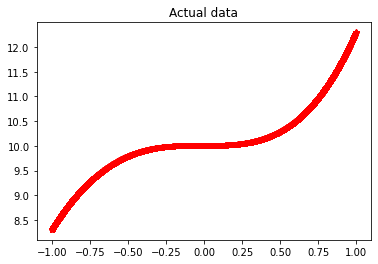

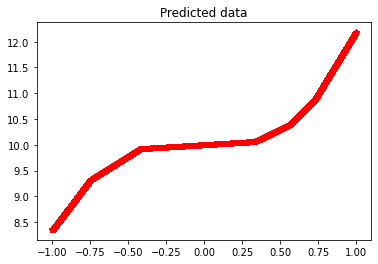

Mae : 0.02077012455114029
MSE : 0.0006938486016590994
RMSE : 0.026341006086691137


In [ ]:

  
x_train = training['X']
y_train = training['y']
print(train)
x_test = testing['X']
y_test = testing['y']

x_validation = validate['X']
y_validation = validate['y']
# Dense = fully connected layer
model = keras.Sequential([
    keras.layers.Dense(12, activation='relu', input_shape=(1,1)),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='linear')
])

print(len(x_test))
model.compile(optimizer='adam',
              loss='MSE')

model.fit(x_train, y_train, epochs=20, batch_size=12)
# print(model.fit)

test_loss = model.evaluate(x_test, y_test)


y_predicted = model.predict(x_test)
print(y_predicted)
ypred = {'y_pred': y_predicted.reshape(len(x_test), )}
y_predicted = pd.DataFrame(data=ypred)


plt.title('Actual data')
plt.plot(x_test, y_test, 'r*')
plt.show()

plt.title('Predicted data')
plt.plot(x_test, y_predicted, 'r*')
plt.show()

mae, mse, rmse =  calc_error(x_train,y_test,  y_predicted)
print(f"Mae : {mae}")
print(f"MSE : {mse}")
print(f"RMSE : {rmse}")

**Case 2:** Use shuffled and unscaled data.
**Activation = relu**

              X         y
27907  0.930288  0.789585
9027   0.300850  0.398552
20303  0.676779  0.450924
13647  0.454876  0.424746
6660   0.221937  0.351452
...         ...       ...
1253   0.041674  0.096183
12281  0.409335  0.422804
16348  0.544924  0.425475
27252  0.908451  0.736493
4068   0.135523  0.258685

[9000 rows x 2 columns]
6000
Epoch 1/20
750/750 [==============================] - 1s 1ms/step - loss: 35.2596
Epoch 2/20
750/750 [==============================] - 1s 1ms/step - loss: 0.0902
Epoch 3/20
750/750 [==============================] - 1s 1ms/step - loss: 0.0639
Epoch 4/20
750/750 [==============================] - 1s 1ms/step - loss: 0.0477
Epoch 5/20
750/750 [==============================] - 1s 1ms/step - loss: 0.0430
Epoch 6/20
750/750 [==============================] - 1s 1ms/step - loss: 0.0399
Epoch 7/20
750/750 [==============================] - 1s 1ms/step - loss: 0.0348
Epoch 8/20
750/750 [==============================] - 1s 1ms/step - loss: 0.0270
Epoch 9/2

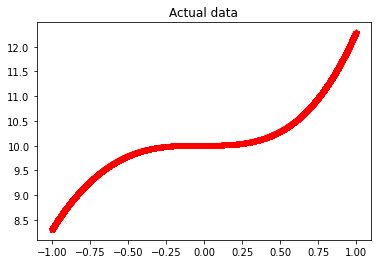

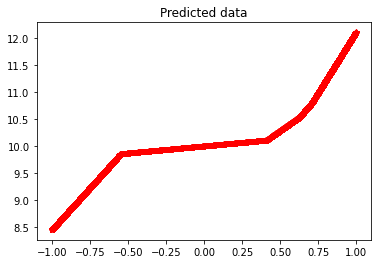

Mae : 0.03368573578799672
MSE : 0.002044432356354641
RMSE : 0.04521539954876702


In [ ]:

  
x_train = training['X']
y_train = training['y']
print(train)
x_test = testing['X']
y_test = testing['y']

x_validation = validate['X']
y_validation = validate['y']
# Dense = fully connected layer
model = keras.Sequential([
    keras.layers.Dense(24, activation='relu', input_shape=(1,1)),
    keras.layers.Dense(1, activation='relu')
])

print(len(x_test))
model.compile(optimizer='adam',
              loss='MSE')

model.fit(x_train, y_train, epochs=20, batch_size=12)
# print(model.fit)

test_loss = model.evaluate(x_test, y_test)


y_predicted = model.predict(x_test)
print(y_predicted)
ypred = {'y_pred': y_predicted.reshape(len(x_test), )}
y_predicted = pd.DataFrame(data=ypred)


plt.title('Actual data')
plt.plot(x_test, y_test, 'r*')
plt.show()

plt.title('Predicted data')
plt.plot(x_test, y_predicted, 'r*')
plt.show()

mae, mse, rmse =  calc_error(x_train,y_test,  y_predicted)
print(f"Mae : {mae}")
print(f"MSE : {mse}")
print(f"RMSE : {rmse}")

**Case 3:** Use shuffled and unscaled data.
**Activation = tanh**

              X         y
180    0.005967  0.014750
4487   0.149543  0.277153
4778   0.159244  0.289105
6492   0.216381  0.346931
18813  0.627108  0.434995
...         ...       ...
7872   0.262384  0.379495
25010  0.833689  0.594651
26839  0.894660  0.705849
12925  0.430829  0.424126
9503   0.316754  0.404605

[9000 rows x 2 columns]
6000
Epoch 1/20
750/750 [==============================] - 2s 2ms/step - loss: 40.0423
Epoch 2/20
750/750 [==============================] - 1s 2ms/step - loss: 8.1391
Epoch 3/20
750/750 [==============================] - 1s 2ms/step - loss: 1.5862
Epoch 4/20
750/750 [==============================] - 1s 2ms/step - loss: 0.6290
Epoch 5/20
750/750 [==============================] - 1s 2ms/step - loss: 0.4676
Epoch 6/20
750/750 [==============================] - 1s 2ms/step - loss: 0.2255
Epoch 7/20
750/750 [==============================] - 1s 2ms/step - loss: 0.1061
Epoch 8/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0377
Epoch 9/2

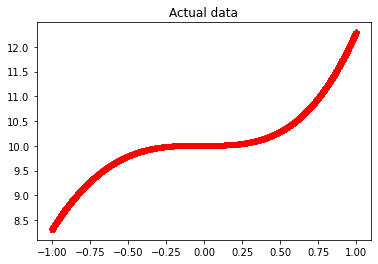

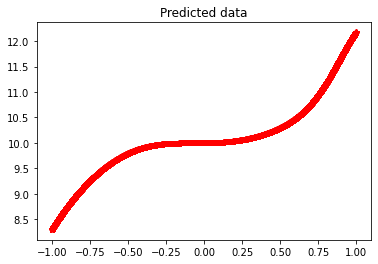

Mae : 0.014014179582492826
MSE : 0.0003754569775381409
RMSE : 0.019376712247905756


In [ ]:

  
x_train = training['X']
y_train = training['y']
print(train)
x_test = testing['X']
y_test = testing['y']

x_validation = validate['X']
y_validation = validate['y']
# Dense = fully connected layer
model = keras.Sequential([
    keras.layers.Dense(12, activation='tanh', input_shape=(1,1)),
    keras.layers.Dense(8, activation='tanh'),
    keras.layers.Dense(4, activation='tanh'),
    keras.layers.Dense(1, activation='linear')
])

print(len(x_test))
model.compile(optimizer='adam',
              loss='MSE')

model.fit(x_train, y_train, epochs=20, batch_size=12)
# print(model.fit)

test_loss = model.evaluate(x_test, y_test)


y_predicted = model.predict(x_test)
print(y_predicted)
ypred = {'y_pred': y_predicted.reshape(len(x_test), )}
y_predicted = pd.DataFrame(data=ypred)


plt.title('Actual data')
plt.plot(x_test, y_test, 'r*')
plt.show()

plt.title('Predicted data')
plt.plot(x_test, y_predicted, 'r*')
plt.show()

mae, mse, rmse =  calc_error(x_train,y_test,  y_predicted)
print(f"Mae : {mae}")
print(f"MSE : {mse}")
print(f"RMSE : {rmse}")

**Case 4:** Use shuffled and scaled data. First, shuffle the data then split the data and finally
scale the data (both x and y).
**Activation = relu**

              X         y
27907  0.930288  0.789585
9027   0.300850  0.398552
20303  0.676779  0.450924
13647  0.454876  0.424746
6660   0.221937  0.351452
...         ...       ...
1253   0.041674  0.096183
12281  0.409335  0.422804
16348  0.544924  0.425475
27252  0.908451  0.736493
4068   0.135523  0.258685

[9000 rows x 2 columns]
6000
Epoch 1/20
750/750 [==============================] - 2s 1ms/step - loss: 0.0080
Epoch 2/20
750/750 [==============================] - 1s 1ms/step - loss: 0.0054
Epoch 3/20
750/750 [==============================] - 1s 1ms/step - loss: 0.0054
Epoch 4/20
750/750 [==============================] - 1s 1ms/step - loss: 0.0054
Epoch 5/20
750/750 [==============================] - 1s 1ms/step - loss: 0.0054
Epoch 6/20
750/750 [==============================] - 1s 1ms/step - loss: 0.0054
Epoch 7/20
750/750 [==============================] - 1s 1ms/step - loss: 0.0054
Epoch 8/20
750/750 [==============================] - 1s 1ms/step - loss: 0.0054
Epoch 9/20

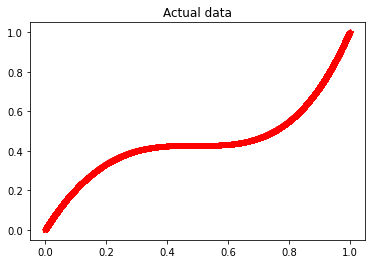

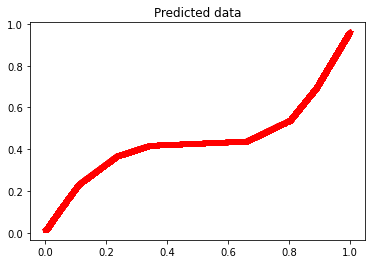

Mae : 0.0037456613073785358
MSE : 4.129356960961592e-05
RMSE : 0.006426007283657242


In [ ]:

  
x_train = train['X']
y_train = train['y']
print(train)
x_test = test['X']
y_test = test['y']

x_validation = validation['X']
y_validation = validation['y']
# Dense = fully connected layer
model = keras.Sequential([
    keras.layers.Dense(12, activation='relu', input_shape=(1,1)),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='relu')
])

print(len(x_test))
model.compile(optimizer='adam',
              loss='MSE')

model.fit(x_train, y_train, epochs=20, batch_size=12)
# print(model.fit)

test_loss = model.evaluate(x_test, y_test)


y_predicted = model.predict(x_test)
print(y_predicted)
ypred = {'y_pred': y_predicted.reshape(len(x_test), )}
y_predicted = pd.DataFrame(data=ypred)


plt.title('Actual data')
plt.plot(x_test, y_test, 'r*')
plt.show()

plt.title('Predicted data')
plt.plot(x_test, y_predicted, 'r*')
plt.show()

mae, mse, rmse =  calc_error(x_train,y_test,  y_predicted)
print(f"Mae : {mae}")
print(f"MSE : {mse}")
print(f"RMSE : {rmse}")

**Case 5:** Use shuffled and scaled data. First, shuffle the data then split the data and finally
scale the data (both x and y).
**Activation = tanh**

              X         y
180    0.005967  0.014750
4487   0.149543  0.277153
4778   0.159244  0.289105
6492   0.216381  0.346931
18813  0.627108  0.434995
...         ...       ...
7872   0.262384  0.379495
25010  0.833689  0.594651
26839  0.894660  0.705849
12925  0.430829  0.424126
9503   0.316754  0.404605

[9000 rows x 2 columns]
6000
Epoch 1/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0137
Epoch 2/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0078
Epoch 3/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0077
Epoch 4/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0076
Epoch 5/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0075
Epoch 6/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0073
Epoch 7/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0071
Epoch 8/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0069
Epoch 9/20

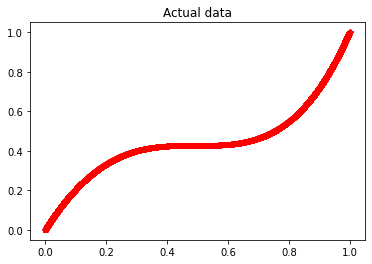

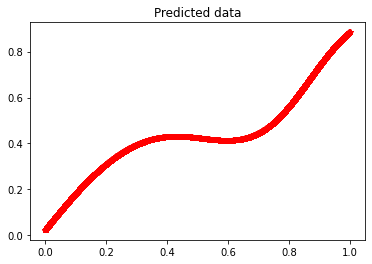

Mae : 0.015720909602110866
MSE : 0.0004797575345761825
RMSE : 0.021903368110319985


In [ ]:

  
x_train = train['X']
y_train = train['y']
print(train)
x_test = test['X']
y_test = test['y']

x_validation = validation['X']
y_validation = validation['y']
# Dense = fully connected layer
model = keras.Sequential([
    keras.layers.Dense(12, activation='tanh', input_shape=(1,1)),
    keras.layers.Dense(8, activation='tanh'),
    keras.layers.Dense(4, activation='tanh'),
    keras.layers.Dense(1, activation='tanh')
])

print(len(x_test))
model.compile(optimizer='adam',
              loss='MSE')

model.fit(x_train, y_train, epochs=20, batch_size=12)
# print(model.fit)

test_loss = model.evaluate(x_test, y_test)


y_predicted = model.predict(x_test)
print(y_predicted)
ypred = {'y_pred': y_predicted.reshape(len(x_test), )}
y_predicted = pd.DataFrame(data=ypred)


plt.title('Actual data')
plt.plot(x_test, y_test, 'r*')
plt.show()

plt.title('Predicted data')
plt.plot(x_test, y_predicted, 'r*')
plt.show()

mae, mse, rmse =  calc_error(x_train,y_test,  y_predicted)
print(f"Mae : {mae}")
print(f"MSE : {mse}")
print(f"RMSE : {rmse}")

**Now For Unshuffeled**

In [ ]:
new_data_set = get_dataset('no', df_dataset) #Unshuff

training, validate, testing = Traning_Testing(0.3, 0.2, 0.5, new_data_set) #Unshuff split

train, test, validation =  scale_data(training, validate, testing) #unshuff
print(training)

             X         y
0    -1.000000  8.300000
1    -0.999933  8.300333
2    -0.999867  8.300667
3    -0.999800  8.301000
4    -0.999733  8.301333
...        ...       ...
8995 -0.400313  9.892860
8996 -0.400247  9.892915
8997 -0.400180  9.892971
8998 -0.400113  9.893026
8999 -0.400047  9.893081

[9000 rows x 2 columns]


**Q1.2: ** Use un shuffled and unscaled data.
**Activation**: Relu

             X         y
0     0.000000  0.000000
1     0.000111  0.000209
2     0.000222  0.000418
3     0.000333  0.000628
4     0.000444  0.000837
...        ...       ...
8995  0.999556  0.999861
8996  0.999667  0.999896
8997  0.999778  0.999931
8998  0.999889  0.999965
8999  1.000000  1.000000

[9000 rows x 2 columns]
6000
Epoch 1/20
750/750 [==============================] - 3s 2ms/step - loss: 15.9863
Epoch 2/20
750/750 [==============================] - 2s 2ms/step - loss: 1.0727
Epoch 3/20
750/750 [==============================] - 2s 3ms/step - loss: 0.1657
Epoch 4/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0096
Epoch 5/20
750/750 [==============================] - 1s 1ms/step - loss: 0.0062
Epoch 6/20
750/750 [==============================] - 1s 1ms/step - loss: 0.0046
Epoch 7/20
750/750 [==============================] - 1s 1ms/step - loss: 0.0044
Epoch 8/20
750/750 [==============================] - 1s 1ms/step - loss: 0.0043
Epoch 9/20
750/750 [=

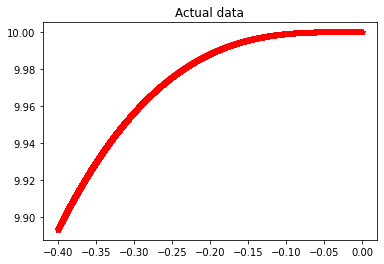

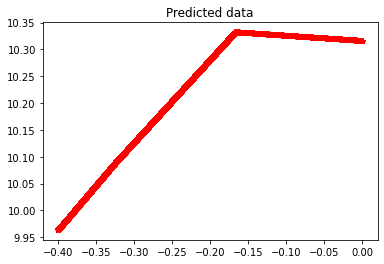

Mae : 0.2488573553568712
MSE : 0.06965202512336766
RMSE : 0.26391670110731463


In [ ]:

  
x_train = training['X']
y_train = training['y']
print(train)
x_test = testing['X']
y_test = testing['y']

x_validation = validate['X']
y_validation = validate['y']
# Dense = fully connected layer
model = keras.Sequential([
    keras.layers.Dense(12, activation='relu', input_shape=(1,1)),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='linear')
])

print(len(x_test))
model.compile(optimizer='adam',
              loss='MSE')

model.fit(x_train, y_train, epochs=20, batch_size=12)
# print(model.fit)

test_loss = model.evaluate(x_test, y_test)


y_predicted = model.predict(x_test)
print(y_predicted)
ypred = {'y_pred': y_predicted.reshape(len(x_test), )}
y_predicted = pd.DataFrame(data=ypred)


plt.title('Actual data')
plt.plot(x_test, y_test, 'r*')
plt.show()

plt.title('Predicted data')
plt.plot(x_test, y_predicted, 'r*')
plt.show()

mae, mse, rmse =  calc_error(x_train,y_test,  y_predicted)
print(f"Mae : {mae}")
print(f"MSE : {mse}")
print(f"RMSE : {rmse}")

**Case 2:** Use shuffled and unscaled data.
**Activation = relu**

             X         y
0     0.000000  0.000000
1     0.000111  0.000209
2     0.000222  0.000418
3     0.000333  0.000628
4     0.000444  0.000837
...        ...       ...
8995  0.999556  0.999861
8996  0.999667  0.999896
8997  0.999778  0.999931
8998  0.999889  0.999965
8999  1.000000  1.000000

[9000 rows x 2 columns]
6000
Epoch 1/20
750/750 [==============================] - 1s 1ms/step - loss: 24.9207
Epoch 2/20
750/750 [==============================] - 1s 1ms/step - loss: 2.0340
Epoch 3/20
750/750 [==============================] - 1s 1ms/step - loss: 1.4530
Epoch 4/20
750/750 [==============================] - 1s 1ms/step - loss: 0.6509
Epoch 5/20
750/750 [==============================] - 1s 1ms/step - loss: 0.1409
Epoch 6/20
750/750 [==============================] - 1s 1ms/step - loss: 0.0169
Epoch 7/20
750/750 [==============================] - 1s 1ms/step - loss: 0.0069
Epoch 8/20
750/750 [==============================] - 1s 1ms/step - loss: 0.0047
Epoch 9/20
750/750 [=

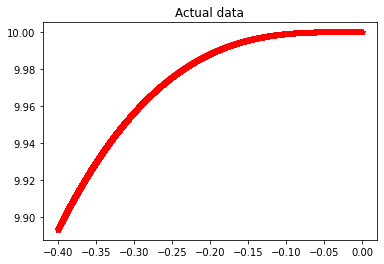

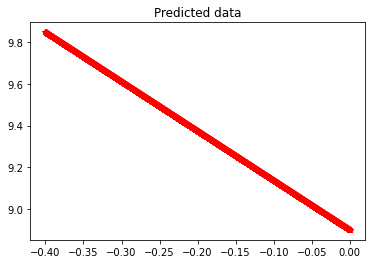

Mae : 0.6008736161384391
MSE : 0.45212910501193776
RMSE : 0.6724054617653977


In [ ]:

  
x_train = training['X']
y_train = training['y']
print(train)
x_test = testing['X']
y_test = testing['y']

x_validation = validate['X']
y_validation = validate['y']
# Dense = fully connected layer
model = keras.Sequential([
    keras.layers.Dense(24, activation='relu', input_shape=(1,1)),
    keras.layers.Dense(1, activation='relu')
])

print(len(x_test))
model.compile(optimizer='adam',
              loss='MSE')

model.fit(x_train, y_train, epochs=20, batch_size=12)
# print(model.fit)

test_loss = model.evaluate(x_test, y_test)


y_predicted = model.predict(x_test)
print(y_predicted)
ypred = {'y_pred': y_predicted.reshape(len(x_test), )}
y_predicted = pd.DataFrame(data=ypred)


plt.title('Actual data')
plt.plot(x_test, y_test, 'r*')
plt.show()

plt.title('Predicted data')
plt.plot(x_test, y_predicted, 'r*')
plt.show()

mae, mse, rmse =  calc_error(x_train,y_test,  y_predicted)
print(f"Mae : {mae}")
print(f"MSE : {mse}")
print(f"RMSE : {rmse}")

**Case 3:** un-shuffled and unscaled data.
**Activation = tanh**

             X         y
0     0.000000  0.000000
1     0.000111  0.000209
2     0.000222  0.000418
3     0.000333  0.000628
4     0.000444  0.000837
...        ...       ...
8995  0.999556  0.999861
8996  0.999667  0.999896
8997  0.999778  0.999931
8998  0.999889  0.999965
8999  1.000000  1.000000

[9000 rows x 2 columns]
6000
Epoch 1/20
750/750 [==============================] - 3s 2ms/step - loss: 33.1243
Epoch 2/20
750/750 [==============================] - 2s 3ms/step - loss: 6.9822
Epoch 3/20
750/750 [==============================] - 2s 2ms/step - loss: 1.0615
Epoch 4/20
750/750 [==============================] - 1s 1ms/step - loss: 0.2543
Epoch 5/20
750/750 [==============================] - 1s 1ms/step - loss: 0.2136
Epoch 6/20
750/750 [==============================] - 1s 1ms/step - loss: 0.2131
Epoch 7/20
750/750 [==============================] - 1s 1ms/step - loss: 0.2130
Epoch 8/20
750/750 [==============================] - 1s 1ms/step - loss: 0.2130
Epoch 9/20
750/750 [=

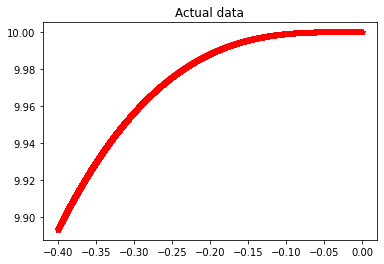

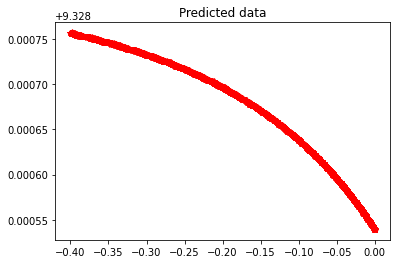

Mae : 0.6456738456878471
MSE : 0.41781179900611826
RMSE : 0.6463836314497129


In [ ]:

  
x_train = training['X']
y_train = training['y']
print(train)
x_test = testing['X']
y_test = testing['y']

x_validation = validate['X']
y_validation = validate['y']
# Dense = fully connected layer
model = keras.Sequential([
    keras.layers.Dense(12, activation='tanh', input_shape=(1,1)),
    keras.layers.Dense(8, activation='tanh'),
    keras.layers.Dense(4, activation='tanh'),
    keras.layers.Dense(1, activation='linear')
])

print(len(x_test))
model.compile(optimizer='adam',
              loss='MSE')

model.fit(x_train, y_train, epochs=20, batch_size=12)
# print(model.fit)

test_loss = model.evaluate(x_test, y_test)


y_predicted = model.predict(x_test)
print(y_predicted)
ypred = {'y_pred': y_predicted.reshape(len(x_test), )}
y_predicted = pd.DataFrame(data=ypred)


plt.title('Actual data')
plt.plot(x_test, y_test, 'r*')
plt.show()

plt.title('Predicted data')
plt.plot(x_test, y_predicted, 'r*')
plt.show()

mae, mse, rmse =  calc_error(x_train,y_test,  y_predicted)
print(f"Mae : {mae}")
print(f"MSE : {mse}")
print(f"RMSE : {rmse}")

**Case 4:** no-shuffled and scaled data. First, shuffle the data then split the data and finally
scale the data (both x and y).
**Activation = relu**

             X         y
0     0.000000  0.000000
1     0.000111  0.000209
2     0.000222  0.000418
3     0.000333  0.000628
4     0.000444  0.000837
...        ...       ...
8995  0.999556  0.999861
8996  0.999667  0.999896
8997  0.999778  0.999931
8998  0.999889  0.999965
8999  1.000000  1.000000

[9000 rows x 2 columns]
6000
Epoch 1/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0064
Epoch 2/20
750/750 [==============================] - 1s 2ms/step - loss: 1.8515e-04
Epoch 3/20
750/750 [==============================] - 1s 1ms/step - loss: 6.3298e-05
Epoch 4/20
750/750 [==============================] - 1s 1ms/step - loss: 2.7913e-05
Epoch 5/20
750/750 [==============================] - 1s 1ms/step - loss: 1.6219e-05
Epoch 6/20
750/750 [==============================] - 1s 1ms/step - loss: 1.2889e-05
Epoch 7/20
750/750 [==============================] - 1s 1ms/step - loss: 1.2530e-05
Epoch 8/20
750/750 [==============================] - 1s 1ms/step - loss: 1.262

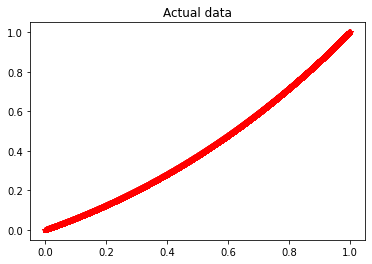

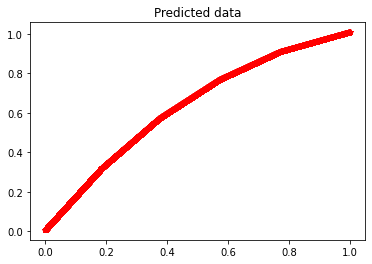

Mae : 0.216698377496201
MSE : 0.056219337750928
RMSE : 0.23710617400423803


In [ ]:

  
x_train = train['X']
y_train = train['y']
print(train)
x_test = test['X']
y_test = test['y']

x_validation = validation['X']
y_validation = validation['y']
# Dense = fully connected layer
model = keras.Sequential([
    keras.layers.Dense(12, activation='relu', input_shape=(1,1)),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='relu')
])

print(len(x_test))
model.compile(optimizer='adam',
              loss='MSE')

model.fit(x_train, y_train, epochs=20, batch_size=12)
# print(model.fit)

test_loss = model.evaluate(x_test, y_test)


y_predicted = model.predict(x_test)
print(y_predicted)
ypred = {'y_pred': y_predicted.reshape(len(x_test), )}
y_predicted = pd.DataFrame(data=ypred)


plt.title('Actual data')
plt.plot(x_test, y_test, 'r*')
plt.show()

plt.title('Predicted data')
plt.plot(x_test, y_predicted, 'r*')
plt.show()

mae, mse, rmse =  calc_error(x_train,y_test,  y_predicted)
print(f"Mae : {mae}")
print(f"MSE : {mse}")
print(f"RMSE : {rmse}")

**Case 5:** Use shuffled and scaled data. First, shuffle the data then split the data and finally
scale the data (both x and y).
**Activation = tanh**

             X         y
0     0.000000  0.000000
1     0.000111  0.000209
2     0.000222  0.000418
3     0.000333  0.000628
4     0.000444  0.000837
...        ...       ...
8995  0.999556  0.999861
8996  0.999667  0.999896
8997  0.999778  0.999931
8998  0.999889  0.999965
8999  1.000000  1.000000

[9000 rows x 2 columns]
6000
Epoch 1/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0286
Epoch 2/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0020
Epoch 3/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0014
Epoch 4/20
750/750 [==============================] - 2s 2ms/step - loss: 7.8800e-04
Epoch 5/20
750/750 [==============================] - 1s 2ms/step - loss: 4.0129e-04
Epoch 6/20
750/750 [==============================] - 1s 2ms/step - loss: 2.6255e-04
Epoch 7/20
750/750 [==============================] - 1s 2ms/step - loss: 1.6169e-04
Epoch 8/20
750/750 [==============================] - 1s 2ms/step - loss: 8.3821e-05
Ep

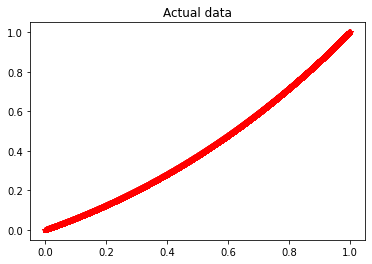

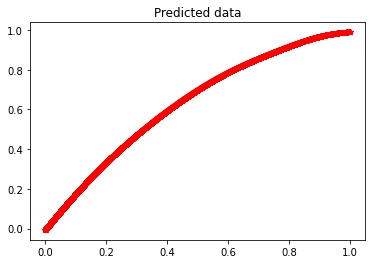

Mae : 0.21350965320144186
MSE : 0.05507952897131019
RMSE : 0.23469028307816706


In [ ]:

  
x_train = train['X']
y_train = train['y']
print(train)
x_test = test['X']
y_test = test['y']

x_validation = validation['X']
y_validation = validation['y']
# Dense = fully connected layer
model = keras.Sequential([
    keras.layers.Dense(12, activation='tanh', input_shape=(1,1)),
    keras.layers.Dense(8, activation='tanh'),
    keras.layers.Dense(4, activation='tanh'),
    keras.layers.Dense(1, activation='tanh')
])

print(len(x_test))
model.compile(optimizer='adam',
              loss='MSE')

model.fit(x_train, y_train, epochs=20, batch_size=12)
# print(model.fit)

test_loss = model.evaluate(x_test, y_test)


y_predicted = model.predict(x_test)
print(y_predicted)
ypred = {'y_pred': y_predicted.reshape(len(x_test), )}
y_predicted = pd.DataFrame(data=ypred)


plt.title('Actual data')
plt.plot(x_test, y_test, 'r*')
plt.show()

plt.title('Predicted data')
plt.plot(x_test, y_predicted, 'r*')
plt.show()

mae, mse, rmse =  calc_error(x_train,y_test,  y_predicted)
print(f"Mae : {mae}")
print(f"MSE : {mse}")
print(f"RMSE : {rmse}")

**Case 6** Neural Network for xor function

**Assumptions: **
- Epochs: 2500
- learning rate (alpha) = 0.2
- Hidden Layers: 1 
- 4 neurons fully connected
- 1 output

In [ ]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

#Used for back propagation
def sigmoid_derivative(x):
    return x * (1 - x)

epochs = 2500
learning_rate = 0.3
input_neurons = 2
hidden_neurons = 4
output_neurons = 1

input_weights = np.array([[0.698, 0.689, 0.169, 0.821], [0.169, 0.161, 0.634, 0.292]])

hidden_weights = np.array([[0.945], [0.250], [0.435], [0.191]])

input_bias = np.random.uniform(size=(1, hidden_neurons))
hidden_bias = np.array([[0.28414861]])

for i in range(epochs):
    # Forward Propagation
    hidden_layer_activation = sigmoid(np.dot(X, input_weights) + input_bias)
    output_layer_activation = sigmoid(np.dot(hidden_layer_activation, hidden_weights) + hidden_bias)

    # Backpropagation
    error = y - output_layer_activation
    output_layer_derivative = sigmoid_derivative(output_layer_activation)
    hidden_layer_derivative = sigmoid_derivative(hidden_layer_activation)
    output_layer_error = error * output_layer_derivative
    hidden_layer_error = np.dot(output_layer_error, hidden_weights.T) * hidden_layer_derivative

    # Update Weights and Biases
    hidden_weights += np.dot(hidden_layer_activation.T, output_layer_error) * learning_rate
    input_weights += np.dot(X.T, hidden_layer_error) * learning_rate
    hidden_bias += np.sum(output_layer_error, axis=0, keepdims=True) * learning_rate
    input_bias += np.sum(hidden_layer_error, axis=0, keepdims=True) * learning_rate




hidden_layer_activation = sigmoid(np.dot(X, input_weights) + input_bias)
output_layer_activation = sigmoid(np.dot(hidden_layer_activation, hidden_weights) + hidden_bias)
print("Predictions:", output_layer_activation)

print("if pred < 0.2 assumption = 0 ")
print("else pred = 1")

Predictions: [[0.05319272]
 [0.9167962 ]
 [0.92331695]
 [0.09396145]]
if pred < 0.2 assumption = 0 
else pred = 1
